### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
import tensorflow as tf
tf.reset_default_graph()
tf.set_random_seed(42)

C:\AIML\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Importing Helper Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
tf.__version__

'1.12.0'

### Collect Data

In [4]:
import keras

Using TensorFlow backend.


In [5]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [6]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [7]:
trainY = tf.keras.utils.to_categorical(
    trainY,
    num_classes=None
)

In [8]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [9]:
testY = tf.keras.utils.to_categorical(
    testY,
    num_classes=None
)

### Visualize the data

Plot first 10 images in the triaining set and their labels.

In [10]:
# Scaling data to be between 0 and 1
trainX = trainX/255.0
testX = testX/255.0

In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

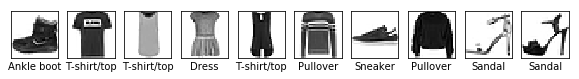

In [12]:
plt.figure(figsize=(10,10))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i],cmap=plt.cm.binary)    
    plt.xlabel(class_names[np.argmax(trainY[i])])

plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Execute the model using model.fit()

In [19]:
model.fit(trainX,trainY,validation_data=(testX, testY),epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.8311 - acc: 0.7354 - val_loss: 0.6548 - val_acc: 0.7854
Epoch 2/10
60000/60000 [==============================] - 5s 76us/step - loss: 0.5924 - acc: 0.8077 - val_loss: 0.5844 - val_acc: 0.8072
Epoch 3/10
60000/60000 [==============================] - 5s 77us/step - loss: 0.5423 - acc: 0.8218 - val_loss: 0.5503 - val_acc: 0.8148
Epoch 4/10
60000/60000 [==============================] - 5s 78us/step - loss: 0.5155 - acc: 0.8291 - val_loss: 0.5321 - val_acc: 0.8199
Epoch 5/10
60000/60000 [==============================] - 4s 74us/step - loss: 0.4979 - acc: 0.8343 - val_loss: 0.5302 - val_acc: 0.8159
Epoch 6/10
60000/60000 [==============================] - 5s 76us/step - loss: 0.4852 - acc: 0.8370 - val_loss: 0.5102 - val_acc: 0.8252
Epoch 7/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.4755 - acc: 0.8400 - val_loss: 0.5016 - val_acc

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [20]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

model2.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Execute the model

In [31]:
model2.fit(trainX,trainY,epochs=10,validation_data=(testX, testY),batch_size=trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.6310 - acc: 0.7841 - val_loss: 0.7399 - val_acc: 0.7758
Epoch 2/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.6304 - acc: 0.7843 - val_loss: 0.7383 - val_acc: 0.7765
Epoch 3/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.6298 - acc: 0.7845 - val_loss: 0.7367 - val_acc: 0.7766
Epoch 4/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.6292 - acc: 0.7847 - val_loss: 0.7352 - val_acc: 0.7769
Epoch 5/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.6287 - acc: 0.7851 - val_loss: 0.7336 - val_acc: 0.7772
Epoch 6/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.6281 - acc: 0.7853 - val_loss: 0.7321 - val_acc: 0.7772
Epoch 7/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.6275 - acc: 0.7856 - val_loss: 0.7306 - val_acc

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [32]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)
model2.compile(optimizer=sgd_optimizer, 
               loss='categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
model2.fit(trainX,trainY,epochs=10,validation_data=(testX, testY),batch_size=trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.6253 - acc: 0.7862 - val_loss: 0.7252 - val_acc: 0.7776
Epoch 2/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.6252 - acc: 0.7862 - val_loss: 0.7242 - val_acc: 0.7775
Epoch 3/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.6252 - acc: 0.7862 - val_loss: 0.7233 - val_acc: 0.7774
Epoch 4/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.6251 - acc: 0.7863 - val_loss: 0.7224 - val_acc: 0.7775
Epoch 5/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.6251 - acc: 0.7863 - val_loss: 0.7215 - val_acc: 0.7776
Epoch 6/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.6250 - acc: 0.7863 - val_loss: 0.7206 - val_acc: 0.7775
Epoch 7/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.6250 - acc: 0.7863 - val_loss: 0.7197 - val_acc

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [34]:
model3 = tf.keras.models.Sequential()
model3.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
model3.add(tf.keras.layers.BatchNormalization())
#Adding 3 hidden layer
model3.add(tf.keras.layers.Dense(100, activation='sigmoid'))
model3.add(tf.keras.layers.Dense(100, activation='sigmoid'))
model3.add(tf.keras.layers.Dense(10, activation='sigmoid'))
#Output layer
model3.add(tf.keras.layers.Dense(10, activation='softmax'))

sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)
model3.compile(optimizer=sgd_optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Review model

In [35]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 784)               3136      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
Total params: 92,856
Trainable params: 91,288
Non-trainable params: 1,568
_________________________________________________________________


### Run the model

In [36]:
model3.fit(trainX,trainY,epochs=10,
           validation_data=(testX, testY), 
           batch_size=trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 74us/step - loss: 2.4532 - acc: 0.1000 - val_loss: 2.4442 - val_acc: 0.1000
Epoch 2/10
60000/60000 [==============================] - 4s 63us/step - loss: 2.4470 - acc: 0.1000 - val_loss: 2.4385 - val_acc: 0.1000
Epoch 3/10
60000/60000 [==============================] - 4s 67us/step - loss: 2.4412 - acc: 0.1000 - val_loss: 2.4332 - val_acc: 0.1000
Epoch 4/10
60000/60000 [==============================] - 4s 64us/step - loss: 2.4357 - acc: 0.1000 - val_loss: 2.4281 - val_acc: 0.1000
Epoch 5/10
60000/60000 [==============================] - 4s 68us/step - loss: 2.4304 - acc: 0.1000 - val_loss: 2.4232 - val_acc: 0.1000
Epoch 6/10
60000/60000 [==============================] - 4s 66us/step - loss: 2.4253 - acc: 0.1000 - val_loss: 2.4186 - val_acc: 0.1000
Epoch 7/10
60000/60000 [==============================] - 4s 63us/step - loss: 2.4205 - acc: 0.1000 - val_loss: 2.4142 - val_acc